In [3]:
import pandas as pd
import numpy as np
from yahoo_fin import stock_info
from yahoo_fin.stock_info import get_data

In [4]:
def get_cov_mat(stocks):

    data_dict = dict()
    for stock in stocks:
        yahoo_ticker = stock+'.NS'
        d1 = get_data(yahoo_ticker, start_date = '07/04/2022')
        d1 = d1.drop(columns = ['open', 'low', 'high', 'volume', 'adjclose', 'ticker'])
        data_dict[stock] = d1

    data = []
    for key in data_dict:
        data_dict[key] = data_dict[key].rename(columns={'close': key})
        data.append(data_dict[key])

    price_data = pd.concat(data, axis=1, join='inner')

    log_ret = np.log(price_data/price_data.shift(1))

    cov_mat = log_ret.cov()
    cov_mat = cov_mat*252  #assuming 252 trading days in a year

    ret = (log_ret.mean()+1)**252-1

    return ret, cov_mat

In [5]:
stocks = ['ITC', 'HDFCBANK']
returns, cov_mat = get_cov_mat(stocks = ['ITC', 'HDFCBANK'])

In [6]:
returns

ITC         0.460742
HDFCBANK    0.318443
dtype: float64

In [7]:
wts = np.array([1,0])
np.dot(returns, wts)

0.4607422439524158

In [8]:
cov_mat

,ITC,HDFCBANK
ITC,0.033201,0.00897
HDFCBANK,0.008970,0.03612


In [9]:
class Portfolio(object):
    def __init__(self, userid, secs, weights):

        if(weights.sum() != 1):
            raise ValueError('Sum of weights must be 1')

        self.userid = userid
        self.secs = secs
        self.weights = weights

        returns, cov_mat  = get_cov_mat(self.secs)

        self.ret = np.dot(returns, self.weights)*100
        self.std = np.sqrt(np.dot(self.weights.T, np.dot(cov_mat, self.weights.T)))*100

    def __str__(self):
        return f"Returns: {self.ret}% Std: {self.std}%"

In [10]:
secs = ['ITC', 'HDFCBANK', 'ICICIBANK']
weights = np.array([0.3, 0.4, 0.3])
p1 = Portfolio(1, secs, weights)

In [11]:
print(p1)

Returns: 35.50777490747175% Std: 14.278993091969403%


In [12]:
#Creating a simulation to check portflio returns against several weight combinations

wlist1 = np.random.rand(100, 1)

In [13]:
wlist2 = 1-wlist1

In [14]:
weights_list = []
for w1, w2 in zip(wlist1, wlist2):
    weights_list.append(np.array([w1, w2]))

In [15]:
weights_list[0].reshape(2,).shape

(2,)

In [16]:
np.array([1,2]).shape

(2,)

In [17]:
secs = ['ITC', 'HDFCBANK']
returns = []
risk = []
i = 1
for weights in weights_list:
    p1 = Portfolio(1, secs, weights.reshape(2,))
    returns.append(p1.ret)
    risk.append(p1.std)
    print(i)
    i=i+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [20]:
import matplotlib.pyplot as plt

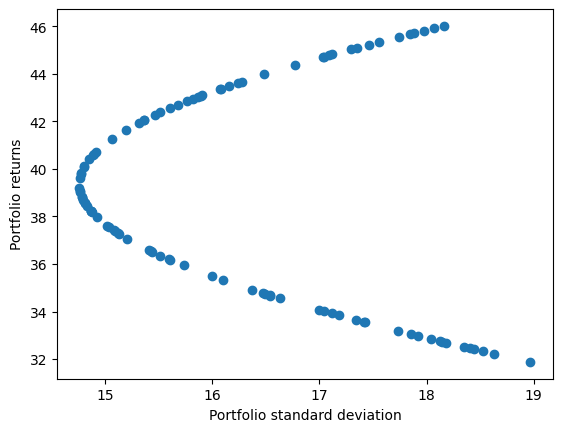

In [21]:
plt.scatter(risk, returns)
plt.xlabel('Portfolio standard deviation')
plt.ylabel('Portfolio returns')
plt.show()

In [ ]:
newsapi_key = 'c32984abd4cd46cca5231ecb278e7d42'